# Prediksi Kemungkinan Pasien Meninggal Akibat Gagal Jantung
Dengan Metode Klasifikasi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Understanding
-  Age: usia pasien (dalam tahun)

-  Anemia: Penurunan sel darah merah atau hemoglobin

- High blood pressure: Jika pasien menderita hipertensi

- Creatinine phosphokinase: Tingkat enzim CPK dalam darah (mcg/L)

- Diabetes: Jika pasien menderita diabetes

- Ejection fraction: Persentase darah yang meninggalkan jantung pada setiap kontraksi

- Sex: Jenis Kelamin

- Platelets: Trombosit dalam darah (kiloplatelet/mL)

-  Serum creatinine: Tingkat kreatinin dalam darah (mg/dL)

-  Serum sodium: Tingkat natrium dalam darah (mEq/L)

-  Smoking: Jika pasien merokok

-  Time:: Periode tindak lanjut

-  (target) death event: Jika pasien meninggal selama masa tindak lanjut

Data tersebut digunakan untuk pembuatan model, dengan prediksi pasien meninggal atau tidak

## Data Preparation
Import Data dan Package

In [22]:
from sklearn.model_selection import RepeatedKFold
from IPython import get_ipython
from IPython.display import display
!pip install seaborn --upgrade
import pandas as pd # Data Manipulasi
import numpy as np # Perhitungan Komputasi

# Data Preprocessing
from imblearn.over_sampling import SMOTE # deal with imbalance data
from sklearn.preprocessing import MinMaxScaler, PowerTransformer # scale data

# Data Visualisasi
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
import plotly.express as px
from sklearn.tree import plot_tree # decision tree
import sklearn
import graphviz
import yellowbrick

# classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression # linear classification
from sklearn.svm import LinearSVC, SVC # support vector machines
from sklearn.tree import DecisionTreeClassifier # tree based
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier,\
AdaBoostClassifier, GradientBoostingClassifier
from sklearn.dummy import DummyClassifier

# Evaluasi Model
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, RocCurveDisplay # Import RocCurveDisplay instead of plot_roc_curve
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score

import os
import warnings
warnings.filterwarnings('ignore')

In [23]:
data_r = pd.read_csv('/content/drive/MyDrive/Bootcamp/heart_failure_records_dataset.csv')
data_r.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [ ]:
data_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
data_r.shape

(299, 13)

## Data Preprocessing
### Data Cleaning

In [ ]:
data_r.isna().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


In [24]:
data_r.age = data_r.age.astype('int64') # ubah tipe data age menjadi numeric utntuk prhitungan data

In [25]:
# mempersiapkan data numerik dan kategori
numeric = ['age', 'creatinine_phosphokinase',
           'ejection_fraction', 'platelets',
           'serum_creatinine', 'time']
categorical = ['anaemia', 'diabetes', 'high_blood_pressure',
               'sex', 'smoking']

## EDA

Pengecekan 'Hasil' kumpulan data terhadap indeksnya (nomor baris). Dengan memplot Hasil terhadap indeks kerangka data (dalam sumbu x).

Text(0, 0.5, 'Outcome')

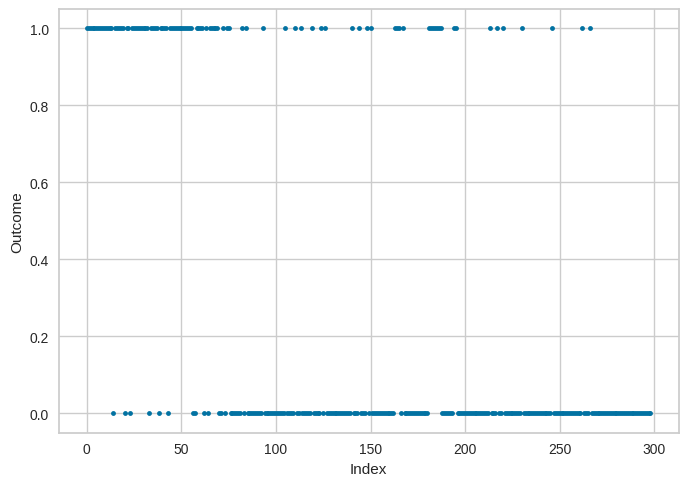

In [ ]:
plt.figure()
plt.plot(data_r.DEATH_EVENT,'.')
plt.xlabel('Index')
plt.ylabel('Outcome')

Pada visualisasi tersebut data teracak, yang menandakan data tersebut bagus. Selanjutnya memeriksa ketidakseimbangan kelas dengan Stratified sampling.

### Pengecekan Kelas atau label target yang tidak seimbang

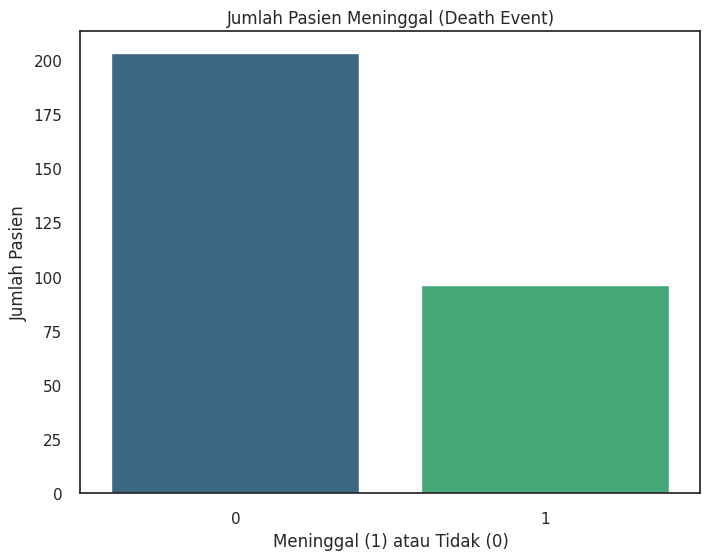

In [ ]:
# Visualisasi jumlah death_event

plt.figure(figsize=(8, 6))
sns.countplot(x='DEATH_EVENT', data=data_r, palette="viridis")
plt.title('Jumlah Pasien Meninggal (Death Event)')
plt.xlabel('Meninggal (1) atau Tidak (0)')
plt.ylabel('Jumlah Pasien')
plt.show()

Terdapat lebih banyak sample data yang tidak meninggal dibandingkan sample data meninggal.

### Distribusi Data Numeric

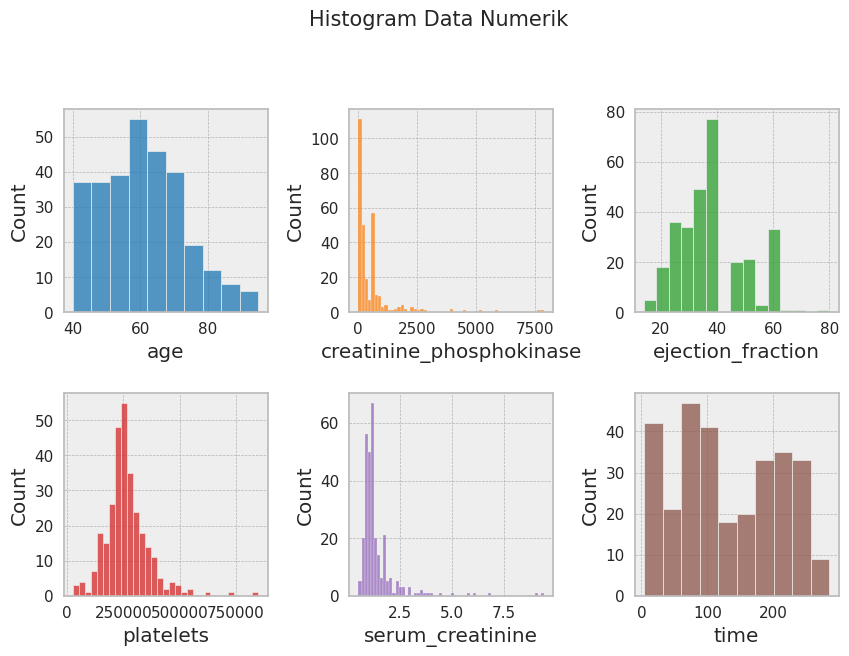

In [ ]:
colors = sns.color_palette("tab10")
with plt.style.context('bmh'):
    plt.figure(figsize=(10, 10))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    for i, (col, name) in enumerate(zip(colors, numeric)):
        plt.subplot(3, 3, i+1)
        sns.histplot(data=data_r, x=name, color=col)
    plt.suptitle('Histogram Data Numerik', fontsize=15)

Terlihat creatinine_phosphokinase dan serum_creatinine skew kekanan

### Distribusi Data Kategori

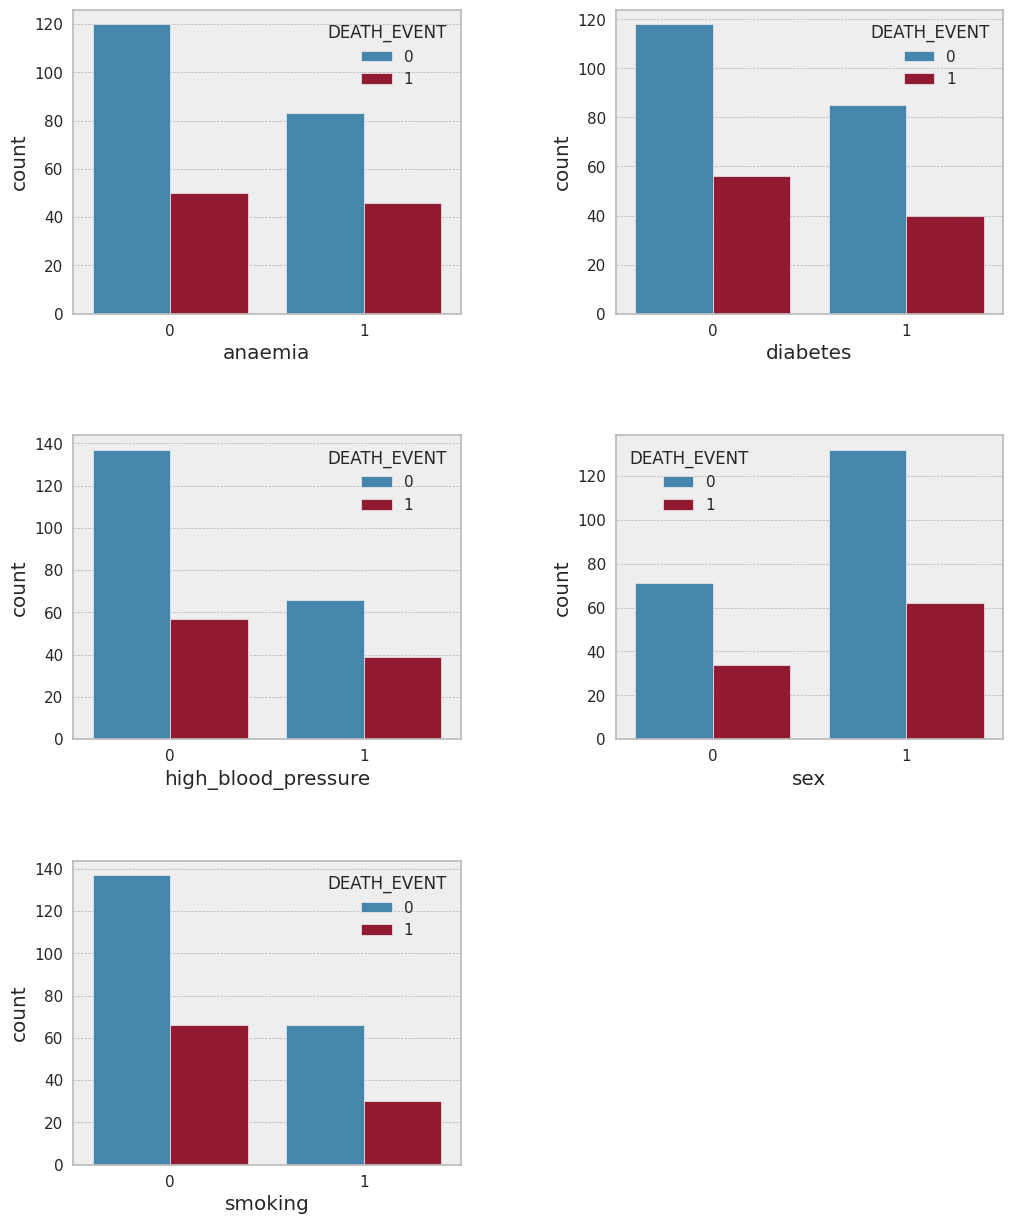

In [ ]:
colors = sns.color_palette("tab10")
with plt.style.context('bmh'):
    plt.figure(figsize=(12, 15))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    for i, (col, name) in enumerate(zip(colors, categorical)):
        plt.subplot(3, 2, i+1)
        sns.countplot(data=data_r, x=name, hue='DEATH_EVENT')

### Cek Distribusi Data

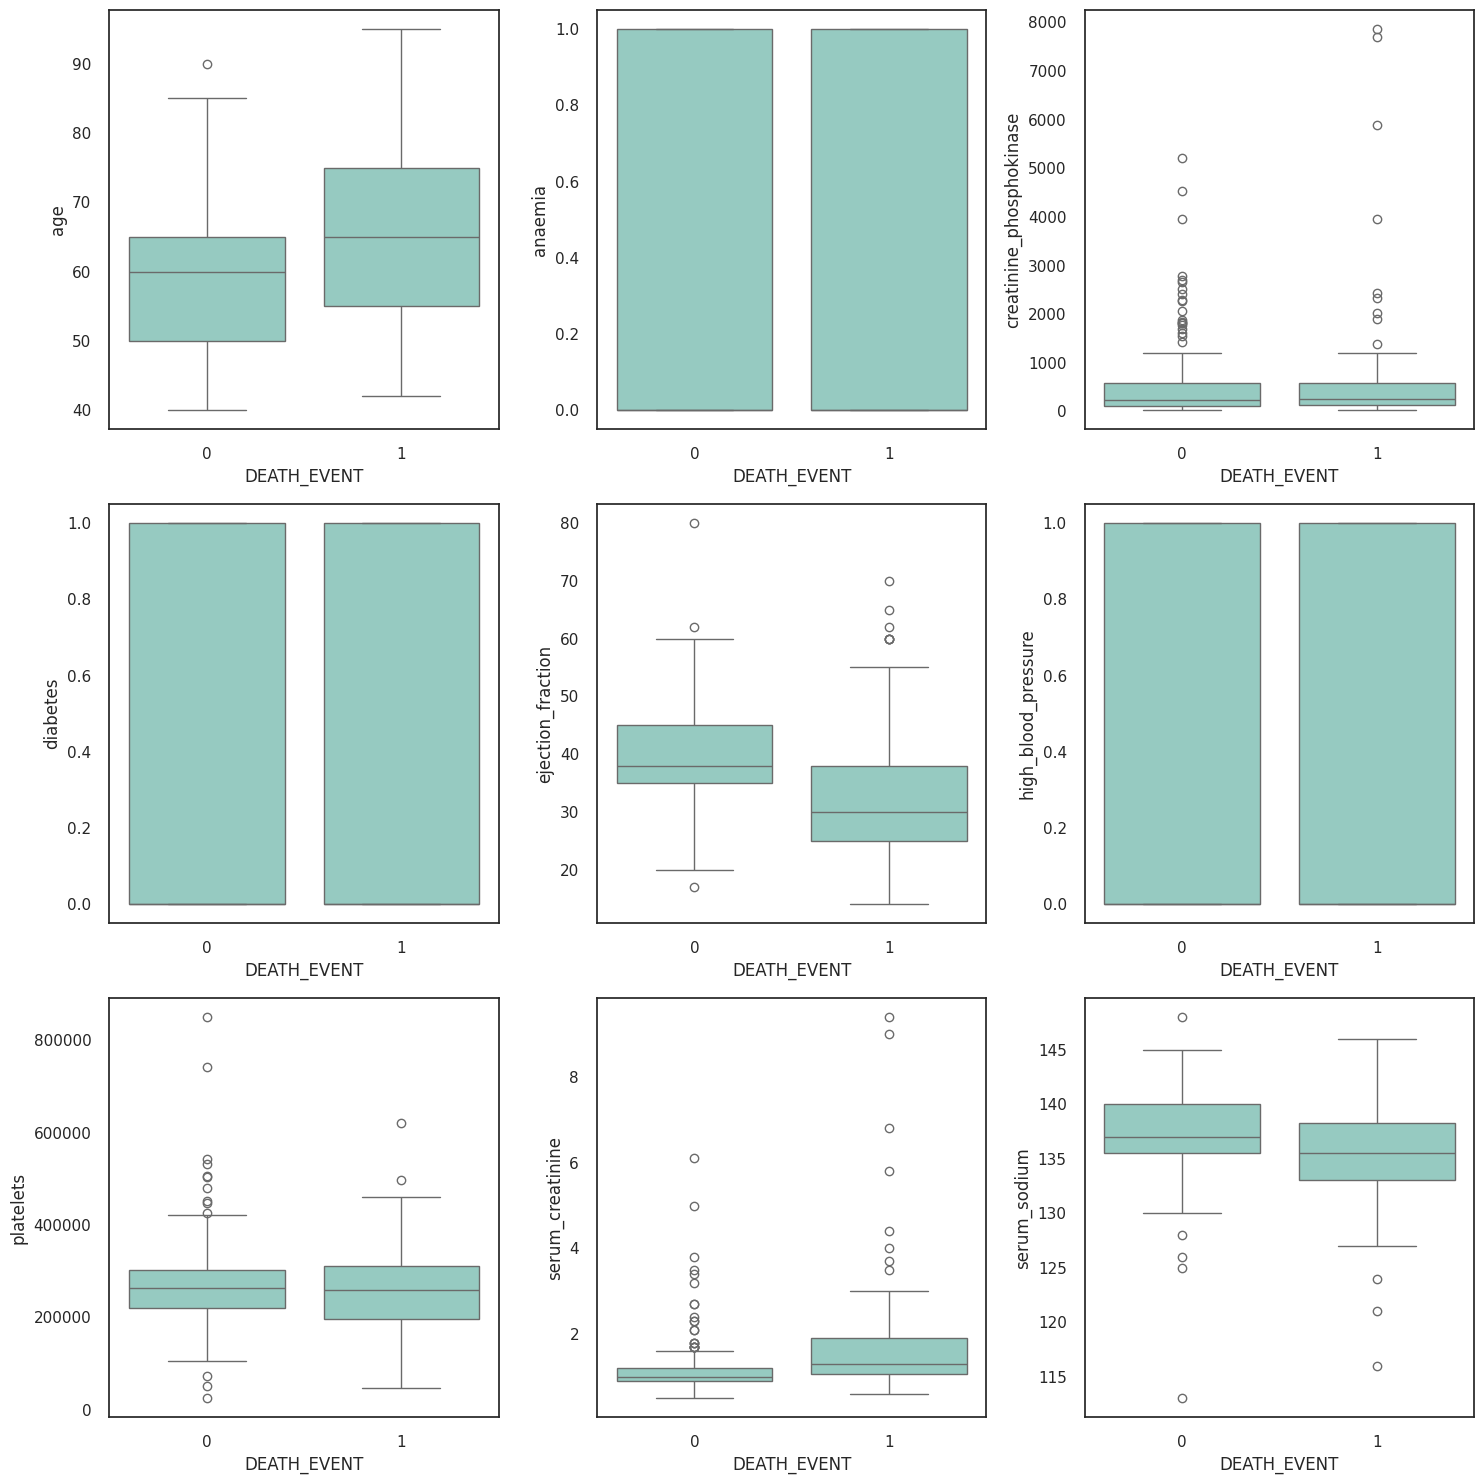

In [ ]:
f, axes = plt.subplots(3, 3,figsize=(15,15)) # Changed to 3 rows and 3 columns to accommodate all plots
sns.set(style="white", palette="Set3", color_codes=True)
sns.boxplot(y="age", x="DEATH_EVENT", data=data_r, orient='v', ax=axes[0,0])
sns.boxplot(y="anaemia", x="DEATH_EVENT", data=data_r, orient='v', ax=axes[0,1])
sns.boxplot(y="creatinine_phosphokinase", x="DEATH_EVENT", data=data_r, orient='v', ax=axes[0,2])
sns.boxplot(y="diabetes", x="DEATH_EVENT", data=data_r, orient='v', ax=axes[1,0])
sns.boxplot(y="ejection_fraction", x="DEATH_EVENT", data=data_r, orient='v', ax=axes[1,1])
sns.boxplot(y="high_blood_pressure", x="DEATH_EVENT", data=data_r, orient='v', ax=axes[1,2])
sns.boxplot(y="platelets", x="DEATH_EVENT", data=data_r, orient='v', ax=axes[2,0])
sns.boxplot(y="serum_creatinine", x="DEATH_EVENT", data=data_r, orient='v', ax=axes[2,1])
sns.boxplot(y="serum_sodium", x="DEATH_EVENT", data=data_r, orient='v', ax=axes[2,2])
#sns.boxplot(y="sex", x="DEATH_EVENT", data=data_r, orient='v', ax=axes[1,4]) # Removed or adjusted as needed
#sns.boxplot(y="smoking", x="DEATH_EVENT", data=data_r, orient='v', ax=axes[1,5]) # Removed or adjusted as needed
#sns.boxplot(y="time", x="DEATH_EVENT", data=data_r, orient='v', ax=axes[1,6]) # Removed or adjusted as needed


f.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)
plt.tight_layout()

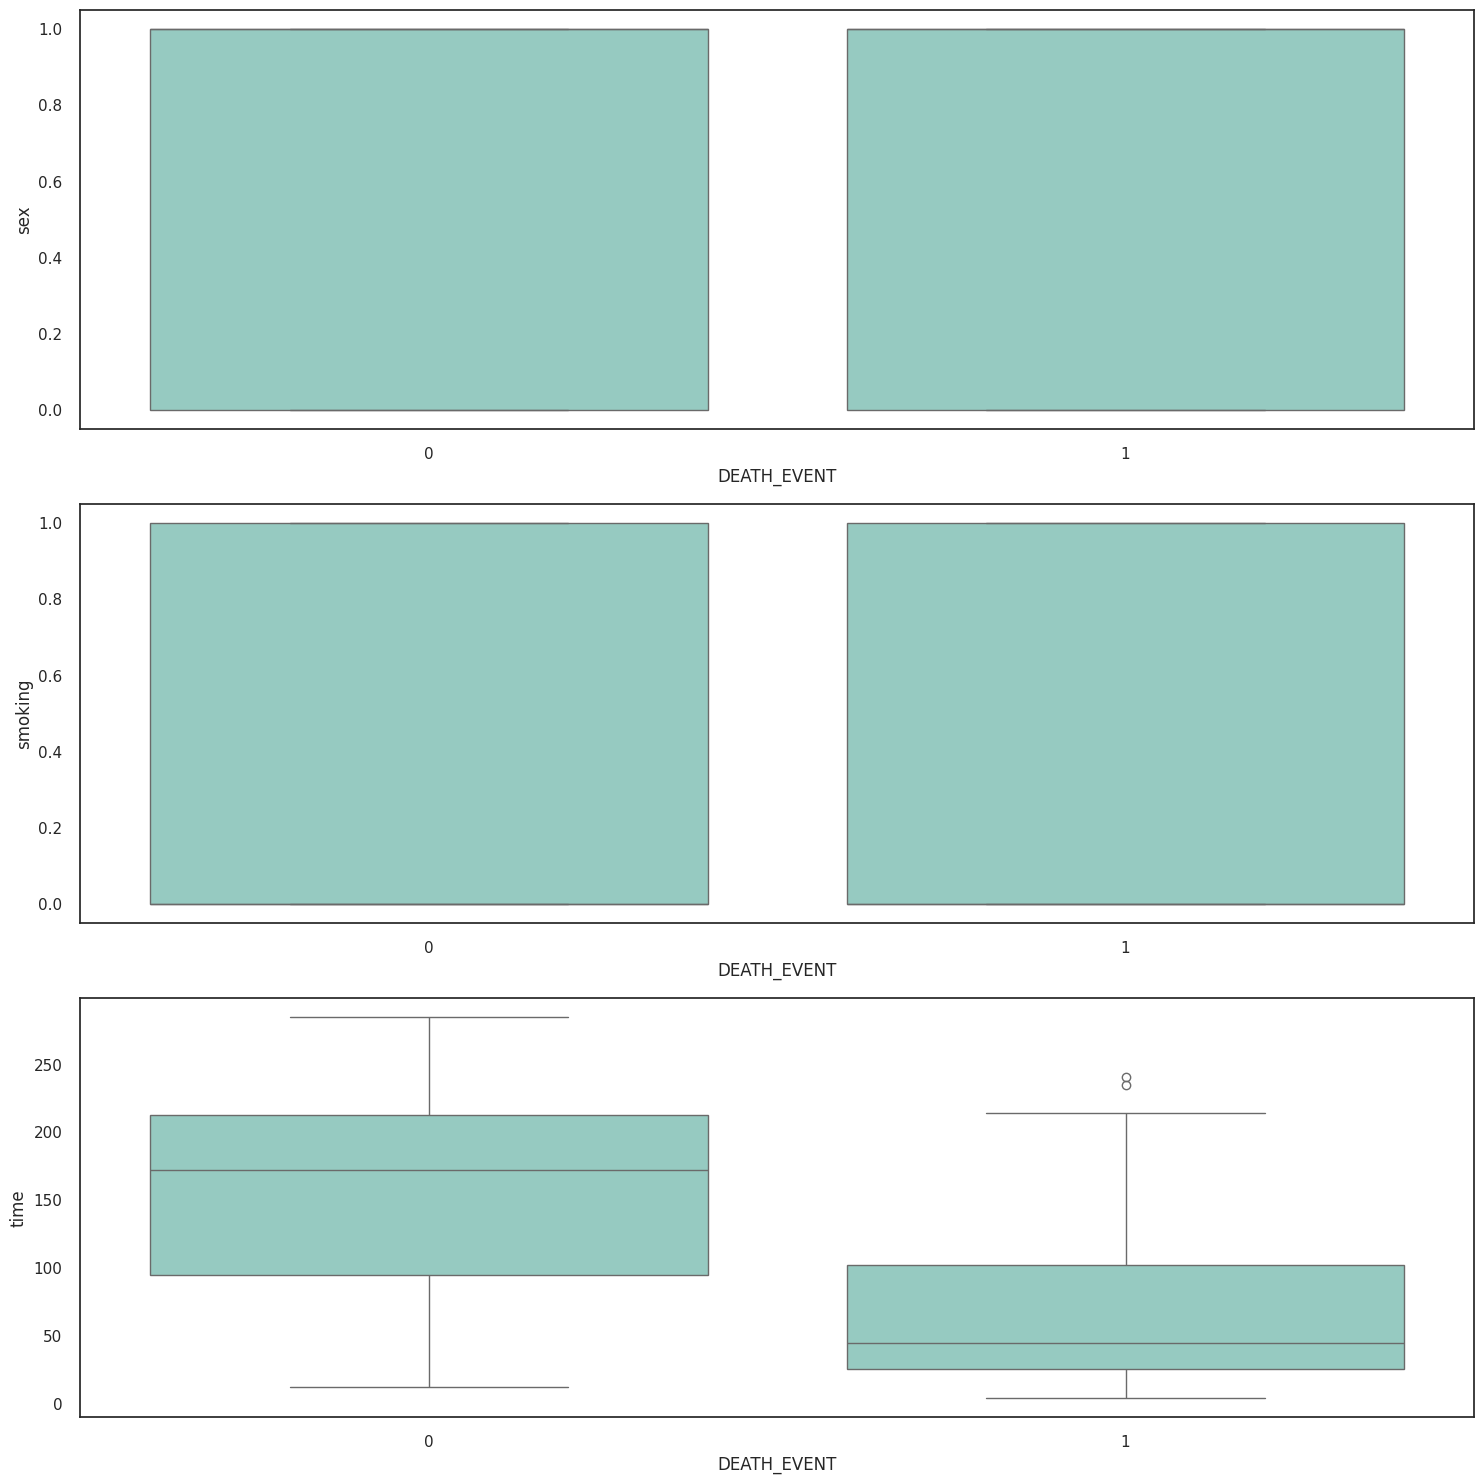

In [ ]:
f, axes = plt.subplots(3, 1,figsize=(15,15))
sns.set(style="white", palette="Set3", color_codes=True)
#sns.boxplot(  y="age", x= "DEATH_EVENT", data=data_r,  orient='v', ax=axes[0,0])
#sns.boxplot(  y="anaemia", x= "DEATH_EVENT", data=data_r,  orient='v' , ax=axes[0,1])
#sns.boxplot(  y="creatinine_phosphokinase", x= "DEATH_EVENT", data=data_r,  orient='v' ,ax=axes[0,2])
#sns.boxplot(  y="diabetes", x= "DEATH_EVENT", data=data_r,  orient='v' , ax=axes[0,3])
#sns.boxplot(  y="ejection_fraction", x= "DEATH_EVENT", data=data_r,  orient='v' ,  ax=axes[1,0])
#sns.boxplot(  y="high_blood_pressure", x= "DEATH_EVENT", data=data_r,  orient='v' ,  ax=axes[1,1])
#sns.boxplot(  y="platelets", x= "DEATH_EVENT", data=data_r,  orient='v' , ax=axes[1,2])
#sns.boxplot(  y="serum_creatinine", x= "DEATH_EVENT", data=data_r,  orient='v' ,  ax=axes[1,3])
#sns.boxplot(  y="serum_sodium", x= "DEATH_EVENT", data=data_r,  orient='v' , ax=axes[1,3])
sns.boxplot(  y="sex", x= "DEATH_EVENT", data=data_r,  orient='v' , ax=axes[0])
sns.boxplot(  y="smoking", x= "DEATH_EVENT", data=data_r,  orient='v' , ax=axes[1])
sns.boxplot(  y="time", x= "DEATH_EVENT", data=data_r,  orient='v' , ax=axes[2])

f.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)
#f.suptitle('Distribution of data')
plt.tight_layout()

Pada visualisasi tersebut tidak terdapat perbedaan yang mencolok kecuali kolom serum_sodium, serum_creatinine, dan time. Yang mana variabel tersebut akan menjadi pembeda.

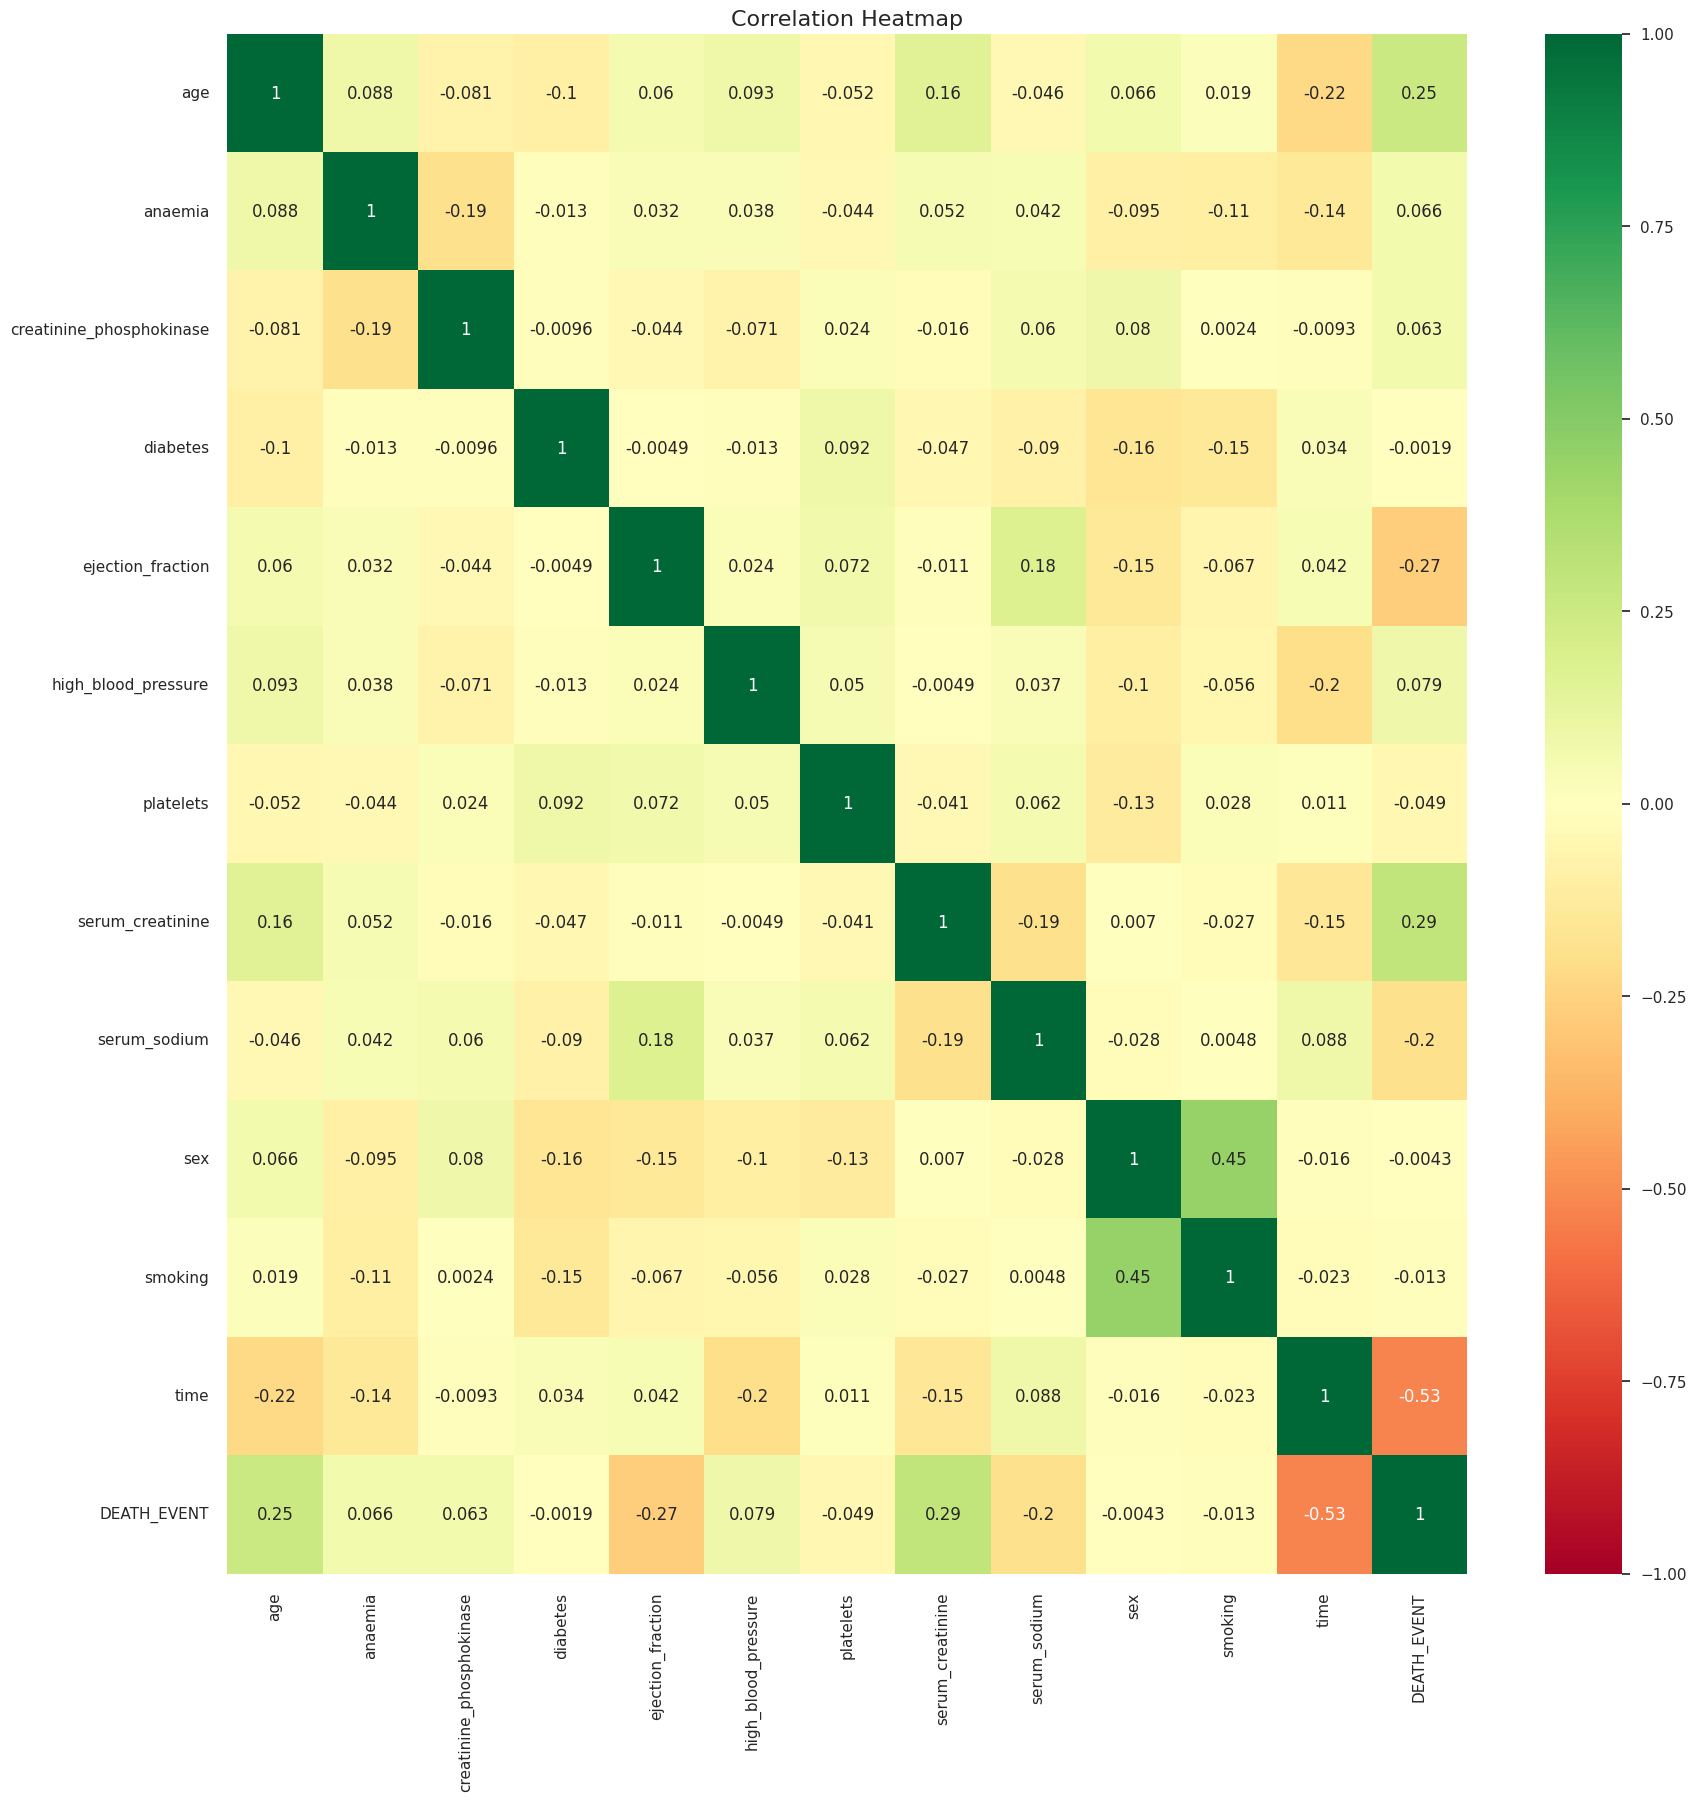

In [ ]:
#Visualisasi heat map korelasi
plt.figure(figsize=(20,20))
corr = data_r.corr()
corr.index = data_r.columns
sns.heatmap(corr, annot = True, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

Pada Visualisasi jelas korelasi antara smoking dan sex, serta korelasi Death_event dengan serum_kreatinine dan age.

## Data Manipulation

In [26]:
# Split feature and target class
X = data_r.iloc[:, :-1]
y = data_r['DEATH_EVENT']
print(X.shape)
print(y.shape)

(299, 12)
(299,)


### Fix Imbalance Data With SMOTH

In [27]:
smote = SMOTE(random_state=2021, n_jobs=-1, k_neighbors=5)
smote.fit(X, y)
X_smote, y_smote = smote.fit_resample(X, y)
print(X_smote.shape)
print(y_smote.shape)

(406, 12)
(406,)


### Transformasi data

Pada data visualisasi creatinine_phosphokinase dan serum_creatinine, data tersebut skew ke kanan. Akibat data tidak terdistribusi normal, maka dilakutan transformasi log

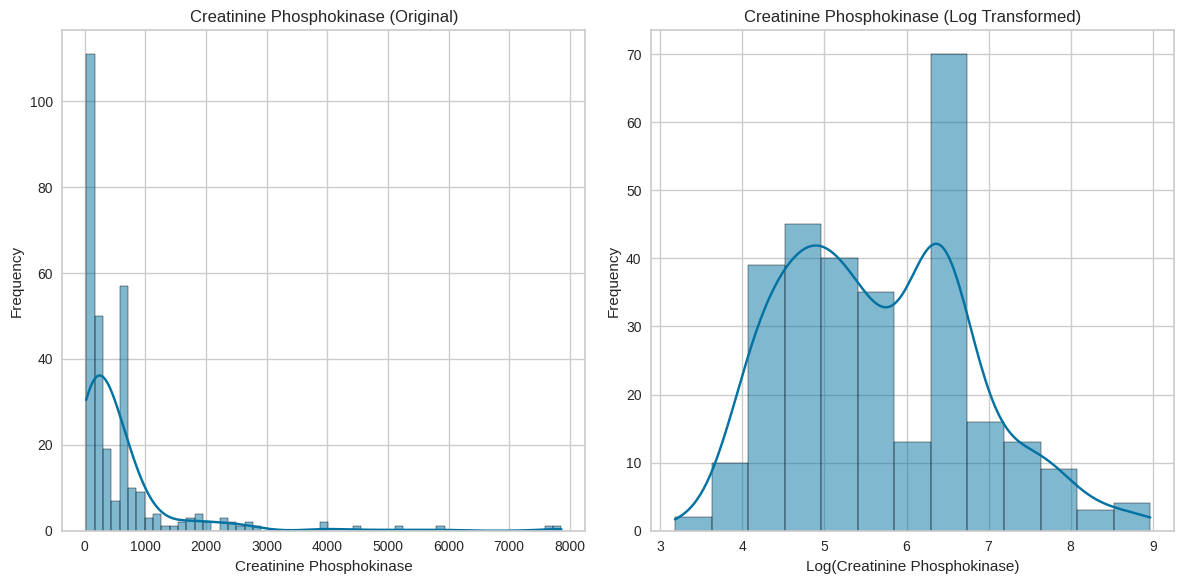

In [28]:
# Transformasi log
data_r['creatinine_phosphokinase_log'] = np.log1p(data_r['creatinine_phosphokinase'])

# Plotting sebelum dan sesudahn
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data_r['creatinine_phosphokinase'], kde=True)
plt.title('Creatinine Phosphokinase (Original)')
plt.xlabel('Creatinine Phosphokinase')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data_r['creatinine_phosphokinase_log'], kde=True)
plt.title('Creatinine Phosphokinase (Log Transformed)')
plt.xlabel('Log(Creatinine Phosphokinase)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

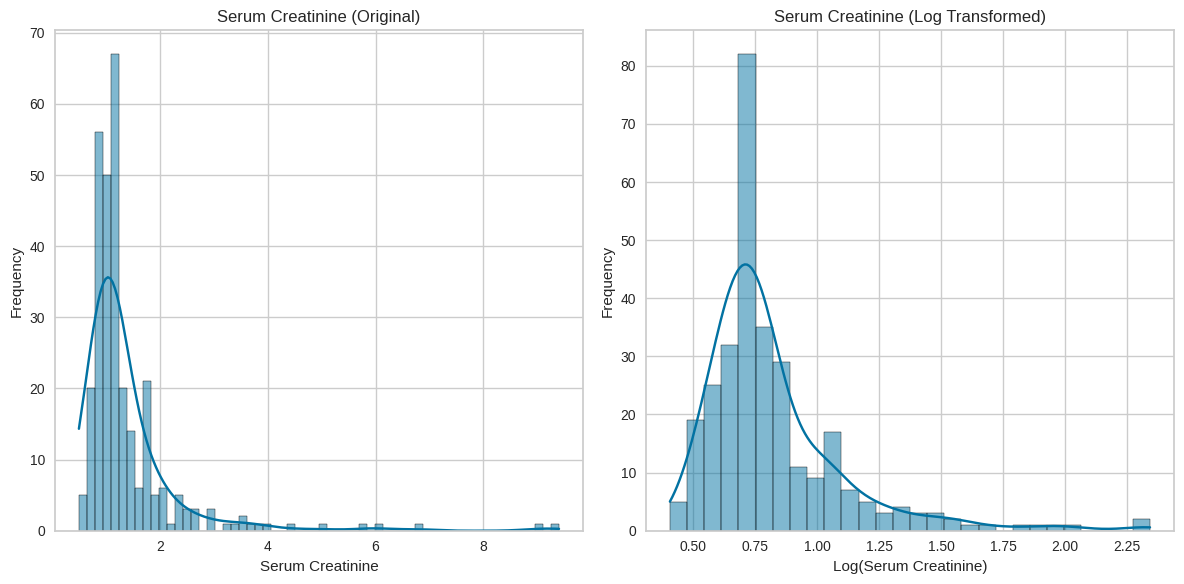

In [29]:

import matplotlib.pyplot as plt
import seaborn as sns

# Transformasi log serum_creatinine
data_r['serum_creatinine_log'] = np.log1p(data_r['serum_creatinine'])

plt.figure(figsize=(12, 6))
#sebelum transformasi
plt.subplot(1, 2, 1)
sns.histplot(data_r['serum_creatinine'], kde=True)
plt.title('Serum Creatinine (Original)')
plt.xlabel('Serum Creatinine')
plt.ylabel('Frequency')

#setelah transformasi
plt.subplot(1, 2, 2)
sns.histplot(data_r['serum_creatinine_log'], kde=True)
plt.title('Serum Creatinine (Log Transformed)')
plt.xlabel('Log(Serum Creatinine)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [30]:
pt = PowerTransformer(method='yeo-johnson')
X_pt = pt.fit_transform(X_smote)
X_pt

array([[ 1.0270975 , -0.78583069,  0.66513694, ...,  0.80647784,
        -0.59062442, -2.09224159],
       [-0.58656988, -0.78583069,  2.55729366, ...,  0.80647784,
        -0.59062442, -1.97807977],
       [ 0.26608504, -0.78583069, -0.60636642, ...,  0.80647784,
         1.69312335, -1.9274372 ],
       ...,
       [ 0.10368013,  1.27253874,  0.53713399, ..., -1.23995968,
        -0.59062442, -1.23081612],
       [ 1.91177672,  1.27253874, -0.74622526, ...,  0.80647784,
        -0.59062442, -0.95808655],
       [-0.67793462,  1.27253874, -0.4004775 , ...,  0.80647784,
        -0.59062442, -1.67628156]])

### Normalisasi Data

In [31]:
mm = MinMaxScaler()
X_scaled = mm.fit_transform(X_pt)

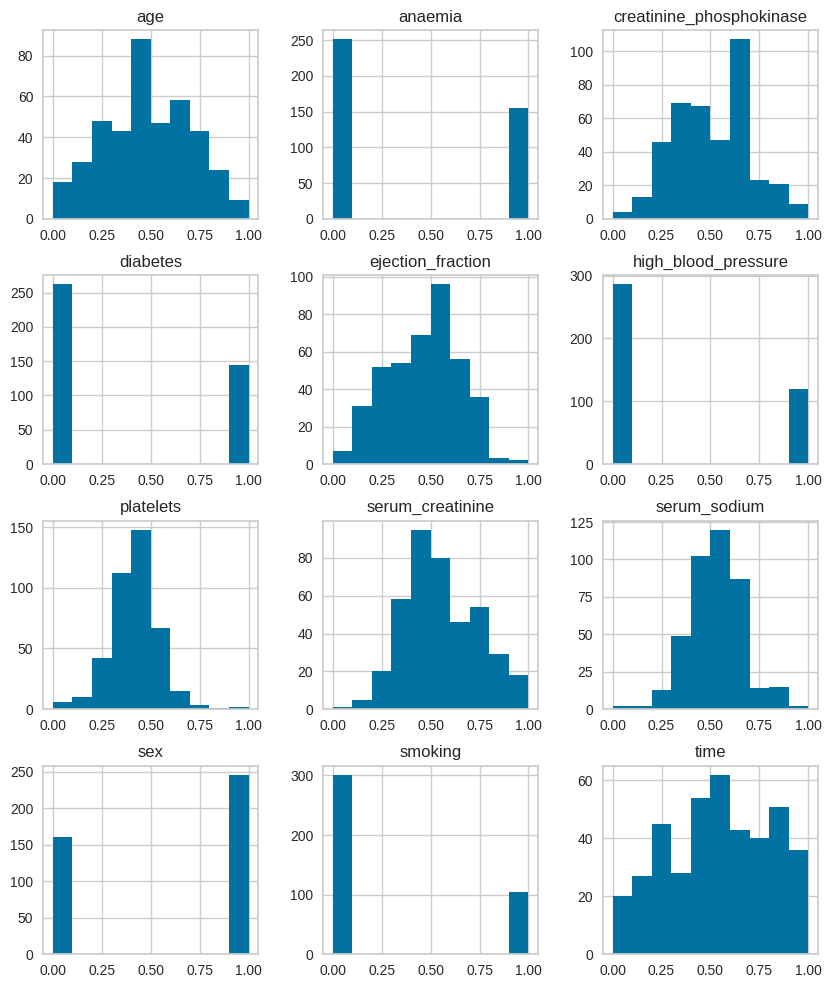

In [32]:
pd.DataFrame(X_scaled, columns=X.columns).hist(figsize=(10, 12))
plt.show()

### Feature Selection
Dengan RandomForest untuk memprediksi hasil berdasarkan fitur masukan yang telah diproses sebelumnya.

In [33]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, n_jobs=-1,
                            class_weight='balanced', random_state=2021)
rf.fit(X_scaled, y_smote)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_jobs=-1,
                       random_state=2021)

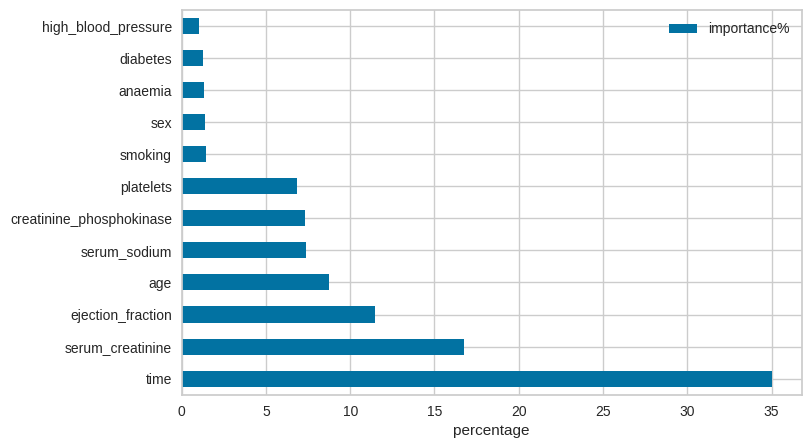

In [34]:
feature_imp = pd.DataFrame(np.round(rf.feature_importances_*100, 2), index=X.columns, columns=['importance%'])
feature_imp = feature_imp.sort_values(by='importance%', ascending=False)
feature_imp.plot(kind='barh', figsize=(8, 5))
plt.xlabel('percentage')
plt.show()

In [35]:
imp_features = feature_imp.index[:3]
imp_features

Index(['time', 'serum_creatinine', 'ejection_fraction'], dtype='object')

In [36]:
X_selected = pd.DataFrame(X_scaled, columns=X.columns)[imp_features]
X_selected

,time,serum_creatinine,ejection_fraction
0,0.000000,0.737676,0.165986
1,0.029502,0.489581,0.512213
2,0.042589,0.575762,0.165986
3,0.042589,0.737676,0.165986
4,0.054846,0.845279,0.165986
...,...,...,...
401,0.142785,0.527085,0.542704
402,0.142785,0.856704,0.319941
403,0.222609,0.436728,0.557539
404,0.293088,0.492972,0.641457


## Permodelan Data

In [37]:
model_data = X_selected
model_data['target'] = y_smote
model_data

,time,serum_creatinine,ejection_fraction,target
0,0.000000,0.737676,0.165986,1
1,0.029502,0.489581,0.512213,1
2,0.042589,0.575762,0.165986,1
3,0.042589,0.737676,0.165986,1
4,0.054846,0.845279,0.165986,1
...,...,...,...,...
401,0.142785,0.527085,0.542704,1
402,0.142785,0.856704,0.319941,1
403,0.222609,0.436728,0.557539,1
404,0.293088,0.492972,0.641457,1


In [38]:
# Buat permodelan data X_train, y_train, X_test,y_test dengan tran sebesar 80% dan train 20%
X_train, X_test, y_train, y_test = train_test_split(model_data.drop(['target'],
                                                    axis=1), model_data['target'],
                                                    test_size=0.20,
                                                    random_state=2021,
                                                    stratify=model_data['target'])
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(324, 3)
(324,)
(82, 3)
(82,)


### K-Nearest Neighbors

In [39]:
knn_clf = KNeighborsClassifier(n_jobs=-1)

# Penyetelan hiperparameter

knn_params = {
    'n_neighbors': np.arange(2, 12)
}
knn_cv = GridSearchCV(knn_clf, knn_params, scoring='f1', n_jobs=-1, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11])},
             scoring='f1')

Didapat kan clustering terbaik = 6

menggunakan model KNN yang sudah dilatih (knn_cv) untuk memprediksi hasil data pelatihan (X_train, y_train). Cross-validation membantu mendapatkan estimasi performa model yang lebih baik dan mengurangi overfitting.

In [40]:
knn_train_pred = cross_val_predict(knn_cv, X_train, y_train, cv=10, n_jobs=-1)
knn_train_pred

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,

In [41]:
print(classification_report(y_train, knn_train_pred, digits=4, target_names=['tidak meninggal', 'kemungkinan meninggal']))

                       precision    recall  f1-score   support

      tidak meninggal     0.8662    0.8395    0.8527       162
kemungkinan meninggal     0.8443    0.8704    0.8571       162

             accuracy                         0.8549       324
            macro avg     0.8553    0.8549    0.8549       324
         weighted avg     0.8553    0.8549    0.8549       324



### Regresi Logistik

In [42]:
lr_clf = LogisticRegression(class_weight='balanced', random_state=2021, n_jobs=-1)

In [43]:

lr_params = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    #'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
lr_cv = GridSearchCV(lr_clf, lr_params, scoring='f1', cv=10, n_jobs=-1)
lr_cv.fit(X_train, y_train) #latih dan mencari model terbaik


lr_cv.best_params_ # Mengambil parameter terbaik

{'C': 1, 'penalty': 'l2'}

In [44]:
# Prediksi pada data pelatihan menggunakan prediksi nilai silang
lr_train_pred = cross_val_predict(lr_cv, X_train, y_train, cv=10, n_jobs=-1)

# Laporan klasifikasi
print(classification_report(y_train, lr_train_pred, digits=4, target_names=['Tidak akan Meninggal', 'Kemungkianan Meninggal']))

                        precision    recall  f1-score   support

  Tidak akan Meninggal     0.8373    0.8580    0.8476       162
Kemungkianan Meninggal     0.8544    0.8333    0.8438       162

              accuracy                         0.8457       324
             macro avg     0.8459    0.8457    0.8457       324
          weighted avg     0.8459    0.8457    0.8457       324



### Decision Tree

In [45]:
dt_clf = DecisionTreeClassifier(class_weight='balanced', random_state=2021)

params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(2, 22, 2), # depth of tree
    'min_samples_split': [2, 3, 4], # min. no. of samples a node must have before it splits
    'min_samples_leaf': [1, 2, 3, 4] # min. non of samples a leaf node must have
}
dt_cv = GridSearchCV(dt_clf, params, scoring='f1', n_jobs=-1, cv=10)
dt_cv.fit(X_train, y_train)

dt_cv.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [46]:
dt_train_pred = cross_val_predict(dt_cv, X_train, y_train, cv=10, n_jobs=-1)

best_dt_clf = DecisionTreeClassifier(class_weight='balanced', random_state=2021,
                                    max_depth=4, criterion='entropy', min_samples_split=2,
                                     min_samples_leaf= 1)

best_dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, random_state=2021)

In [47]:
# Print f1-score, akurasi, recall

# Evaluate Decision Tree
dt_test_pred = best_dt_clf.predict(X_test)
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_test_pred, digits=4, target_names=['Tidak akan Meninggal', 'Kemungkianan Meninggal']))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0     0.8000    0.8780    0.8372        41
           1     0.8649    0.7805    0.8205        41

    accuracy                         0.8293        82
   macro avg     0.8324    0.8293    0.8289        82
weighted avg     0.8324    0.8293    0.8289        82



###Random Forests

In [48]:
rf = RandomForestClassifier(n_jobs=-1, random_state=2021, class_weight='balanced')

params = {
    #'n_estimators': [100, 200, 300],
    'max_depth': np.arange(2, 22, 1),
    #'min_samples_split': [2, 3, 4],
    #'min_samples_leaf': [1, 2, 3, 4],
    'criterion': ['gini', 'entropy']
}
rf_cv = RandomizedSearchCV(rf, params, scoring='f1', n_jobs=-1, cv=10, random_state=2021, n_iter=20)
rf_cv.fit(X_train, y_train)

rf_cv.best_params_rf_train_pred = cross_val_predict(rf_cv, X_train, y_train, cv=10, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  6.4min finished


In [49]:
rf_train_pred = cross_val_predict(rf_cv, X_train,
                                  y_train, cv=10, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  6.8min finished


In [50]:
print(classification_report(y_train, rf_train_pred, digits=4,
                            target_names=['Tidak akan Meninggal', 'Kemungkinan Meninggal']))

                       precision    recall  f1-score   support

 Tidak akan Meninggal     0.8889    0.8889    0.8889       162
Kemungkinan Meninggal     0.8889    0.8889    0.8889       162

             accuracy                         0.8889       324
            macro avg     0.8889    0.8889    0.8889       324
         weighted avg     0.8889    0.8889    0.8889       324



## Evaluasi Model

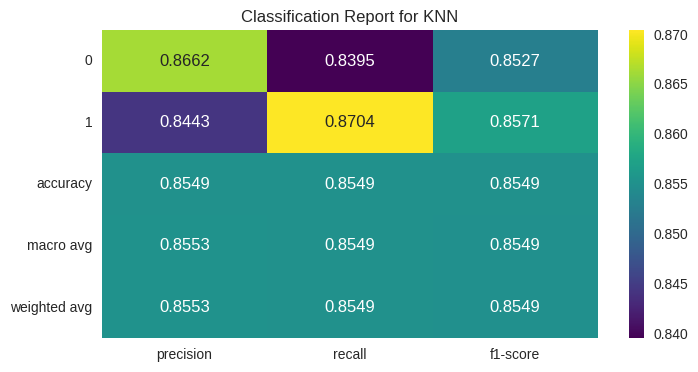

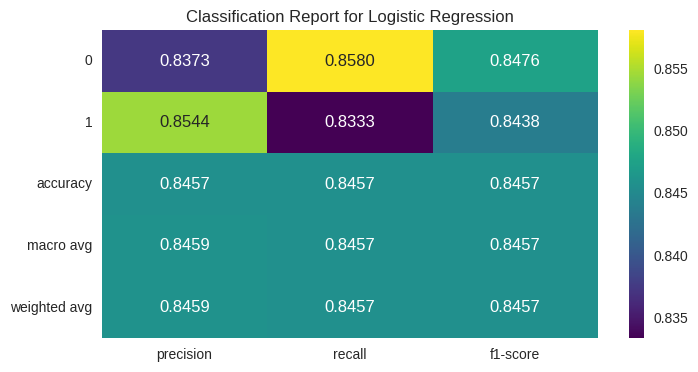

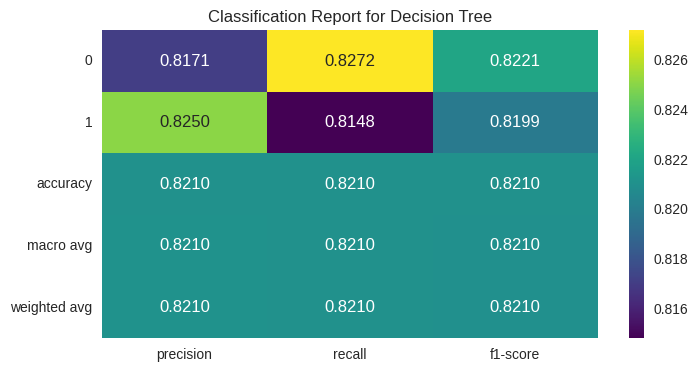

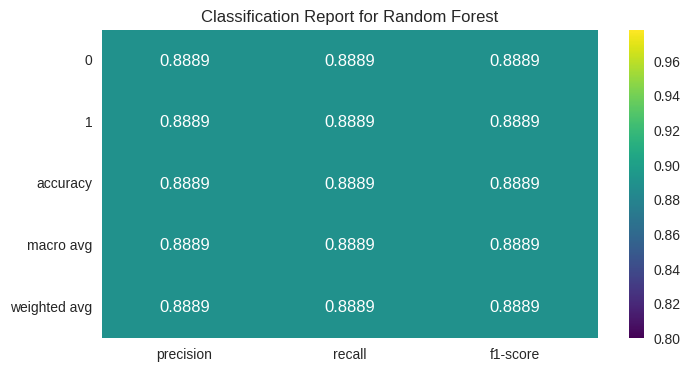

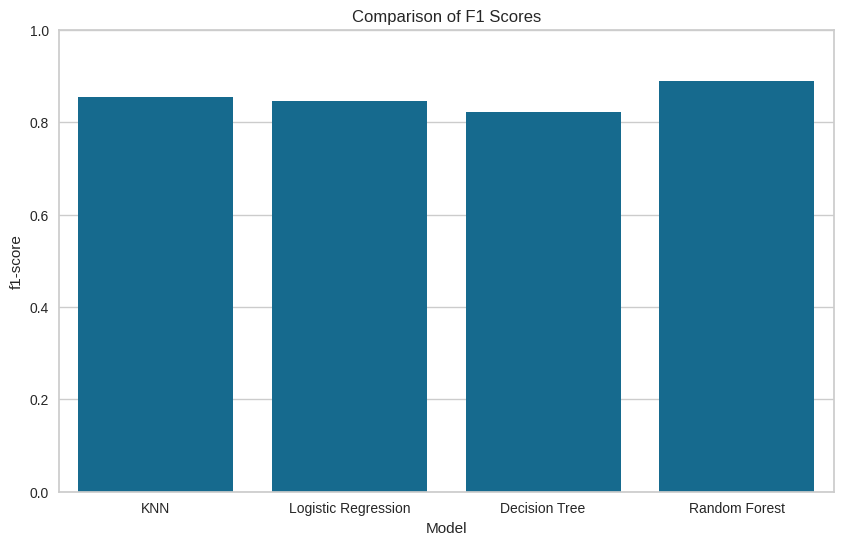

Kesimpulan:
                 Model  f1-score
3        Random Forest  0.888889
0                  KNN  0.854904
1  Logistic Regression  0.845655
2        Decision Tree  0.820981


In [51]:
#buat function plot model
def plot_classification_report(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()
    plt.figure(figsize=(8, 4))
    sns.heatmap(df_report[['precision', 'recall', 'f1-score']], annot=True, cmap="viridis", fmt=".4f")
    plt.title(f"Classification Report for {model_name}")
    plt.show()


# Ganti nama variabel model
plot_classification_report(y_train, knn_train_pred, "KNN")
plot_classification_report(y_train, lr_train_pred, "Logistic Regression")
plot_classification_report(y_train, dt_train_pred, "Decision Tree")
plot_classification_report(y_train, rf_train_pred, "Random Forest")


# Mengkombinasikan semua f-1 score kedalam satu dataframe perbandingan
f1_scores = {
    "Model": ["KNN", "Logistic Regression", "Decision Tree", "Random Forest"],  # Add other model names
    "f1-score": [
        classification_report(y_train, knn_train_pred, output_dict=True)['weighted avg']['f1-score'],
        classification_report(y_train, lr_train_pred, output_dict=True)['weighted avg']['f1-score'],
        classification_report(y_train, dt_train_pred, output_dict=True)['weighted avg']['f1-score'],
        classification_report(y_train, rf_train_pred, output_dict=True)['weighted avg']['f1-score'],

    ]
}

f1_scores_df = pd.DataFrame(f1_scores)

# Visualisasi untuk perbandingan
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="f1-score", data=f1_scores_df)
plt.title("Comparison of F1 Scores")
plt.ylim(0, 1.0)  # Set y-axis limits to 0-1
plt.show()



print("Kesimpulan:")
print(f1_scores_df.sort_values("f1-score", ascending=False))

Pada Kasus Prediksi ini, Model terbaik yang dapat digunakan adalah Random Forest dengan f1-score 88% dan akurasi 88%.

In [55]:
# Print accuracy knn, random forest, desicion tree, logic regresion


# KNN Accuracy
knn_report = classification_report(y_train, knn_train_pred, output_dict=True)
knn_accuracy = knn_report['accuracy']
print(f"KNN Accuracy: {knn_accuracy}")


# Logistic Regression Accuracy
lr_report = classification_report(y_train, lr_train_pred, output_dict=True)
lr_accuracy = lr_report['accuracy']
print(f"Logistic Regression Accuracy: {lr_accuracy}")


# Decision Tree Accuracy
dt_report = classification_report(y_train, dt_train_pred, output_dict=True)
dt_accuracy = dt_report['accuracy']
print(f"Decision Tree Accuracy: {dt_accuracy}")


# Random Forest Accuracy
rf_report = classification_report(y_train, rf_train_pred, output_dict=True)
rf_accuracy = rf_report['accuracy']
print(f"Random Forest Accuracy: {rf_accuracy}")

KNN Accuracy: 0.8549382716049383
Logistic Regression Accuracy: 0.845679012345679
Decision Tree Accuracy: 0.8209876543209876
Random Forest Accuracy: 0.8888888888888888


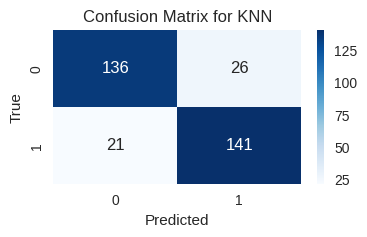

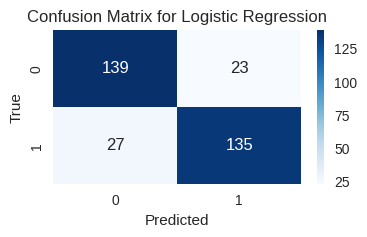

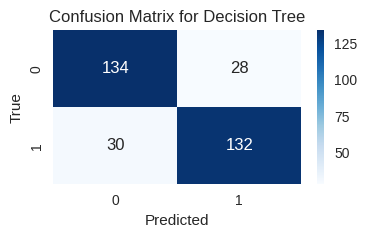

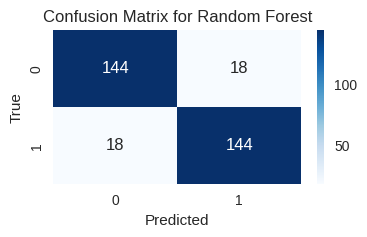

In [54]:
# Confusiion matrix rknn, random forest, decision tree, logistic regresion
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 2))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

plot_confusion_matrix(y_train, knn_train_pred, "KNN")
plot_confusion_matrix(y_train, lr_train_pred, "Logistic Regression")
plot_confusion_matrix(y_train, dt_train_pred, "Decision Tree")
plot_confusion_matrix(y_train, rf_train_pred, "Random Forest")